# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [ ]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta   = "/content/drive/MyDrive/Colab Notebooks/A3_DataVisualization_Cartwheel_EMPTY.ipynb"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# url string that hosts our .csv file
url = "datasets/cartwheel/cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv("/content/sample_data/cartwheel.csv")



# Exploring the content of the data set

Get a general 'feel' of the data


In [ ]:
# Ver las primeras filas del dataset
print(df.head())

# Ver información general sobre el dataset (tipos de datos, valores nulos, memoria usada)
print(df.info())

# Descripción estadística de las variables numéricas
print(df.describe())

# Ver los nombres de las columnas
print(df.columns)

# Ver el número de filas y columnas
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Ver la cantidad de valores únicos en cada columna
print(df.nunique())

# Ver si hay valores nulos en el dataset
print(df.isnull().sum())

# Obtener un resumen general del dataset
print(df.describe(include="all"))  # Incluye variables numéricas y categóricas

   ID   Age Gender  GenderGroup Glasses  GlassesGroup  Height  Wingspan  \
0   1  56.0      F            1       Y             1    62.0      61.0   
1   2  26.0      F            1       Y             1    62.0      60.0   
2   3  33.0      F            1       Y             1    66.0      64.0   
3   4  39.0      F            1       N             0    64.0      63.0   
4   5  27.0      M            2       N             0    73.0      75.0   

   CWDistance Complete  CompleteGroup  Score  
0          79        Y            1.0      7  
1          70        Y            1.0      8  
2          85        Y            1.0      7  
3          87        Y            1.0     10  
4          72        N            0.0      4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             52 non-null     int64  
 1   Age            51 non-null 

# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [ ]:
# Number of times that each distinct value of a variable occurs in a data set

print(df["Gender"].value_counts())

Gender
F    26
M    26
Name: count, dtype: int64


In [ ]:
# Proportion of each distinct value of a variable occurs in a data set

print(df["Gender"].value_counts(normalize=True))

Gender
F    0.5
M    0.5
Name: proportion, dtype: float64


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [ ]:
# Total number of observations

print(f"Total de observaciones: {len(df)}")

# total number of null observations in Age

print(f"Total de valores nulos en Age: {df['Age'].isnull().sum()}")

# Total number of counts in Age (excluding missing values)

print(f"Total de valores no nulos en Age: {df['Age'].count()}")


Total de observaciones: 52
Total de valores nulos en Age: 1
Total de valores no nulos en Age: 51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

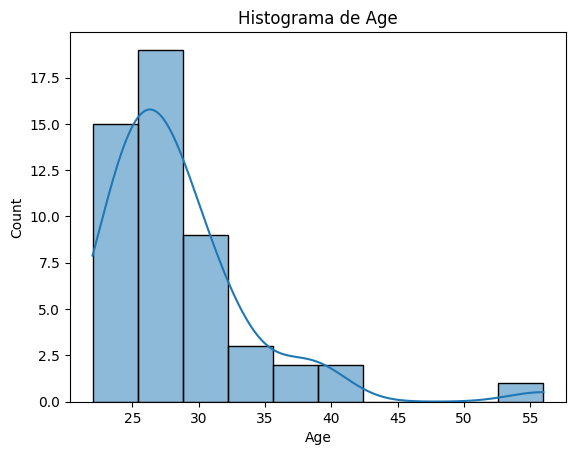

In [ ]:
# Plot histogram of Age

sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Histograma de Age")
plt.show()

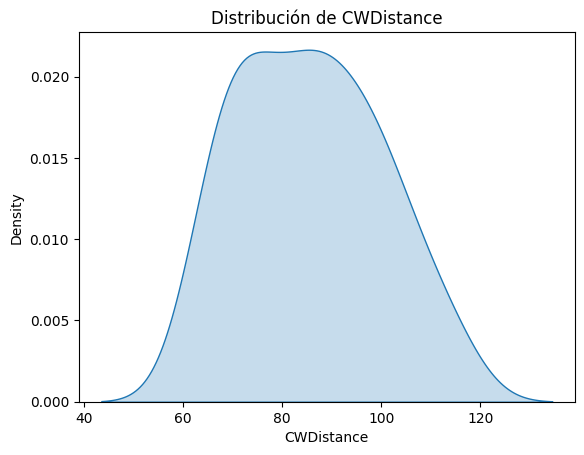

In [ ]:
# Plot distribution of CWDistance

sns.kdeplot(df["CWDistance"], fill=True)
plt.title("Distribución de CWDistance")
plt.show()

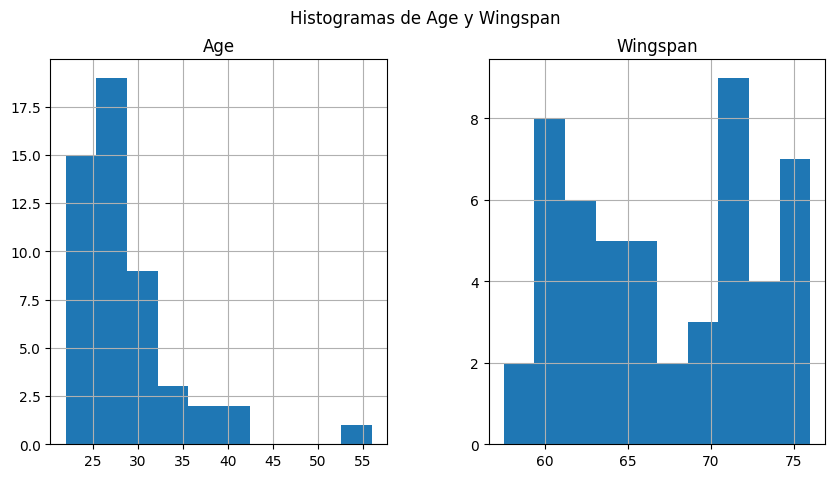

In [ ]:
# Plot histogram of both the Age and the Wingspan

df[["Age", "Wingspan"]].hist(bins=10, figsize=(10, 5))
plt.suptitle("Histogramas de Age y Wingspan")
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

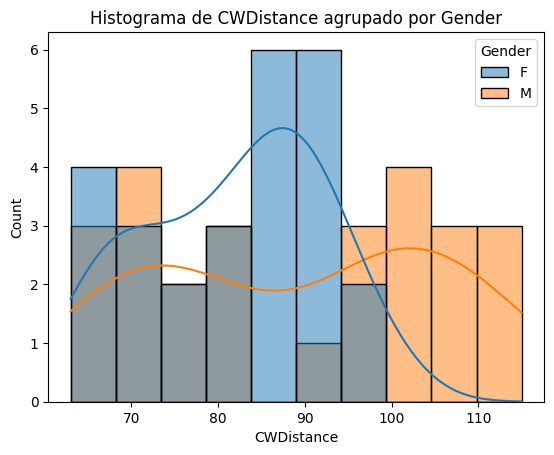

In [26]:
sns.histplot(data=df, x="CWDistance", hue="Gender", kde=True, bins=10)
plt.title("Histograma de CWDistance agrupado por Gender")
plt.show()




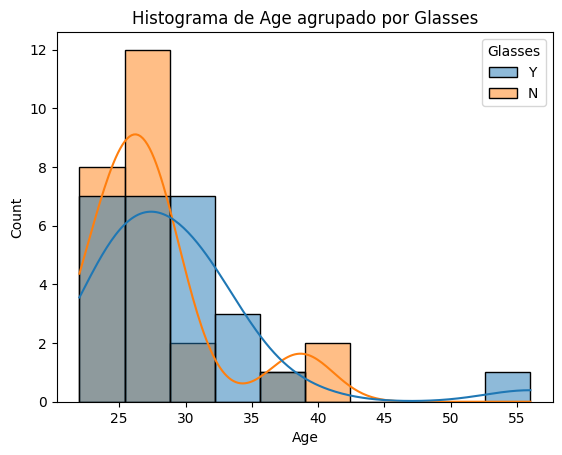

In [27]:
sns.histplot(data=df, x="Age", hue="Glasses", kde=True, bins=10)
plt.title("Histograma de Age agrupado por Glasses")
plt.show()


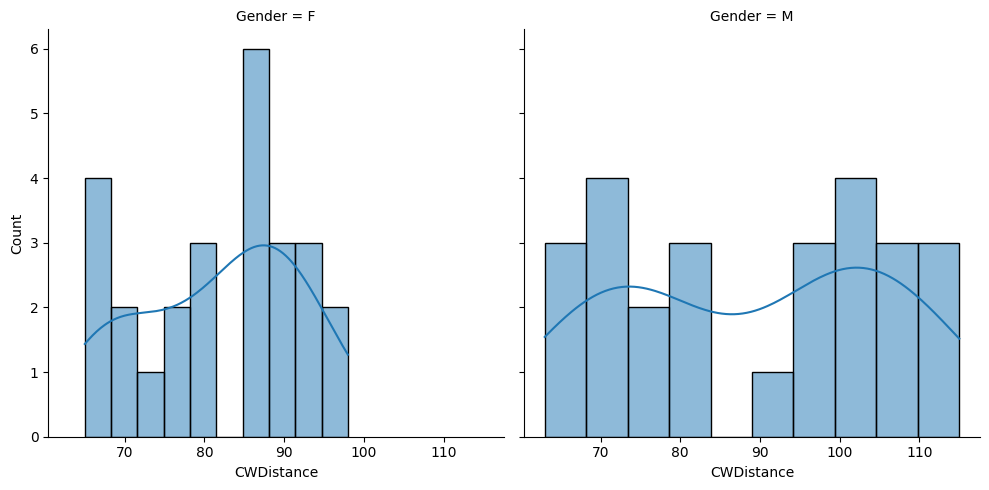

In [28]:
g = sns.FacetGrid(df, col="Gender", height=5)
g.map(sns.histplot, "CWDistance", bins=10, kde=True)
plt.show()


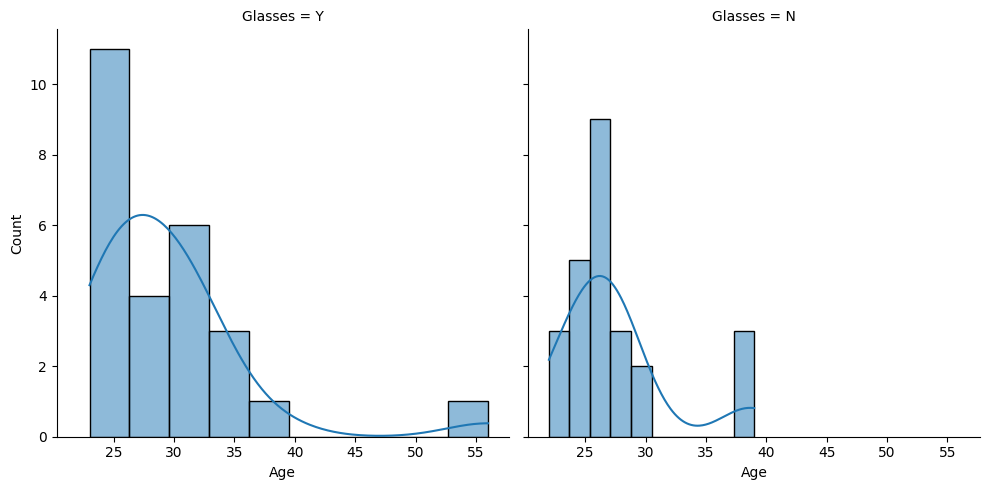

In [29]:
g = sns.FacetGrid(df, col="Glasses", height=5)
g.map(sns.histplot, "Age", bins=10, kde=True)
plt.show()


# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

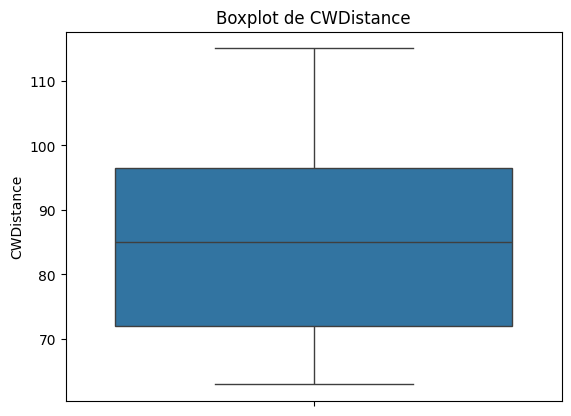

In [ ]:
# Create the boxplot of the "CWDistance"

sns.boxplot(y=df["CWDistance"])
plt.title("Boxplot de CWDistance")
plt.show()

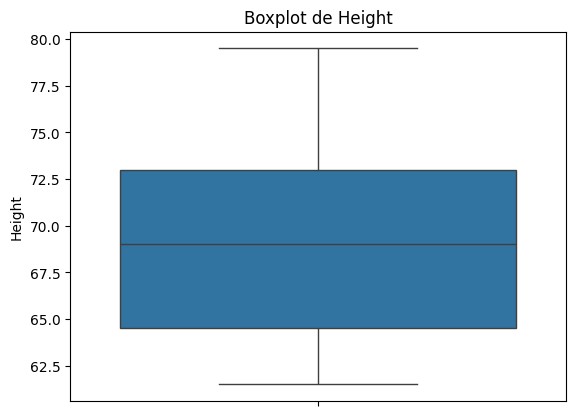

In [ ]:
# Create the boxplot of the "Height"

sns.boxplot(y=df["Height"])
plt.title("Boxplot de Height")
plt.show()

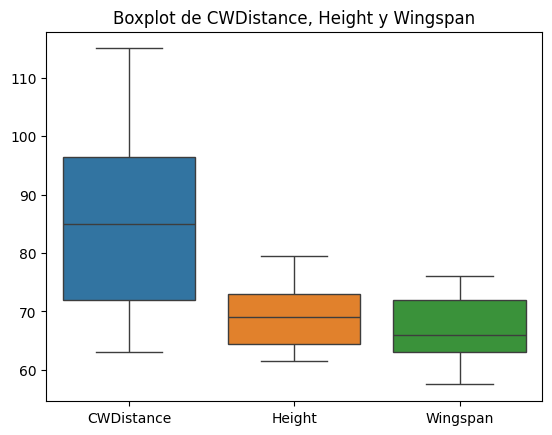

In [ ]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"

sns.boxplot(data=df[["CWDistance", "Height", "Wingspan"]])
plt.title("Boxplot de CWDistance, Height y Wingspan")
plt.show()

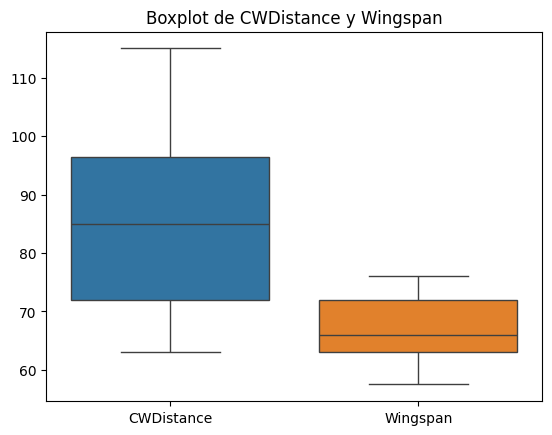

In [ ]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"

sns.boxplot(data=df[["CWDistance", "Wingspan"]])
plt.title("Boxplot de CWDistance y Wingspan")
plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

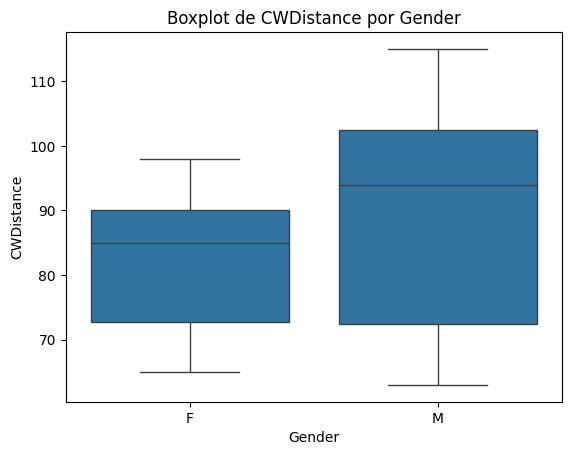

In [ ]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
#sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)

sns.boxplot(x=df["Gender"], y=df["CWDistance"])
plt.title("Boxplot de CWDistance por Gender")
plt.show()

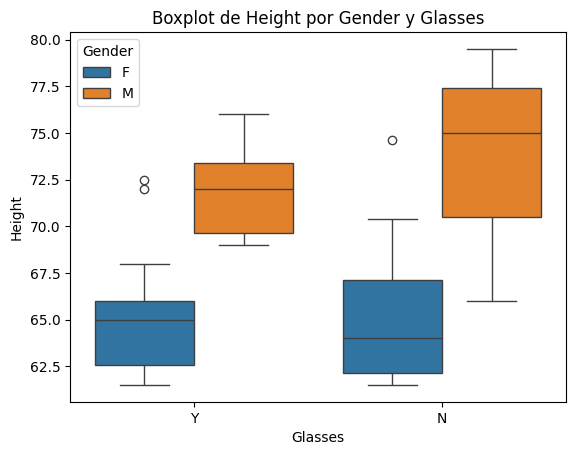

In [ ]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
#sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")

sns.boxplot(x=df["Glasses"], y=df["Height"], hue=df["Gender"])
plt.title("Boxplot de Height por Gender y Glasses")
plt.show()

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


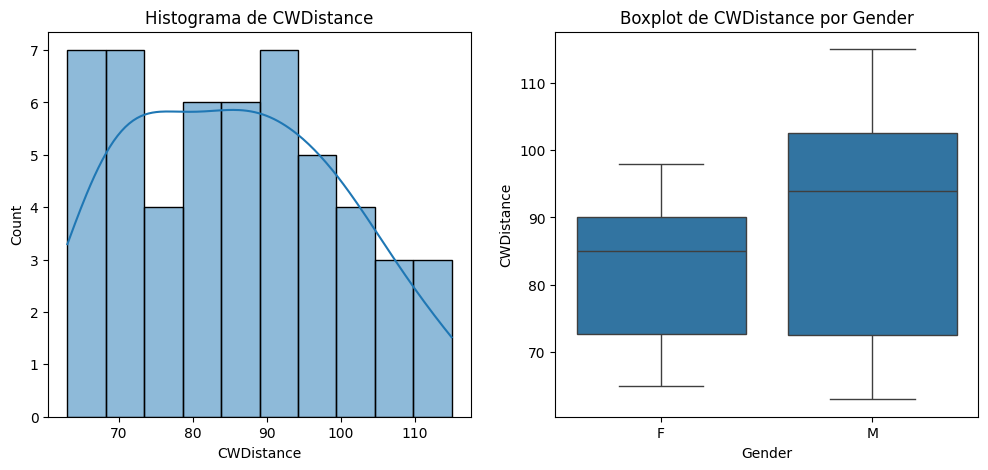

In [ ]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["CWDistance"], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Histograma de CWDistance")
sns.boxplot(y=df["CWDistance"], x=df["Gender"], ax=axes[1])
axes[1].set_title("Boxplot de CWDistance por Gender")
plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

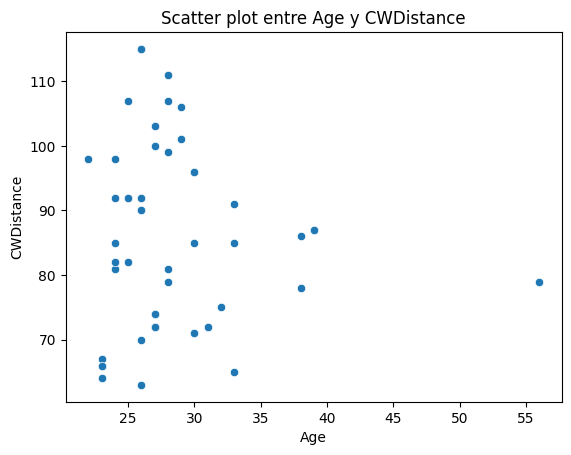

In [ ]:
# scatter plot between two variables

sns.scatterplot(x=df["Age"], y=df["CWDistance"])
plt.title("Scatter plot entre Age y CWDistance")
plt.show()

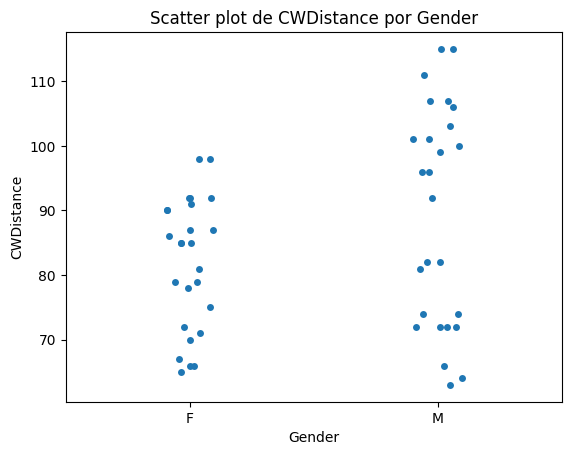

In [ ]:
# scatter plot between two variables (one categorical)

sns.stripplot(x=df["Gender"], y=df["CWDistance"])
plt.title("Scatter plot de CWDistance por Gender")
plt.show()

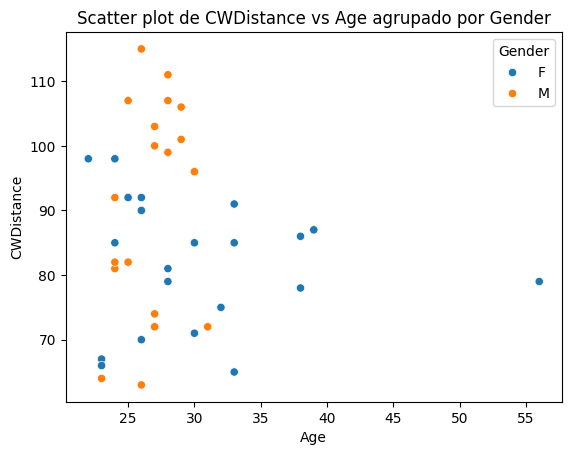

In [ ]:
# scatter plot between two variables grouped according to a categorical variable

sns.scatterplot(x=df["Age"], y=df["CWDistance"], hue=df["Gender"])
plt.title("Scatter plot de CWDistance vs Age agrupado por Gender")
plt.show()

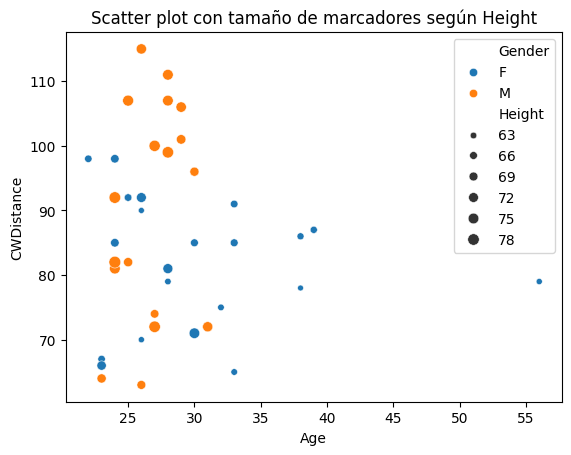

In [ ]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
sns.scatterplot(x=df["Age"], y=df["CWDistance"], hue=df["Gender"], size=df["Height"])
plt.title("Scatter plot con tamaño de marcadores según Height")
plt.show()

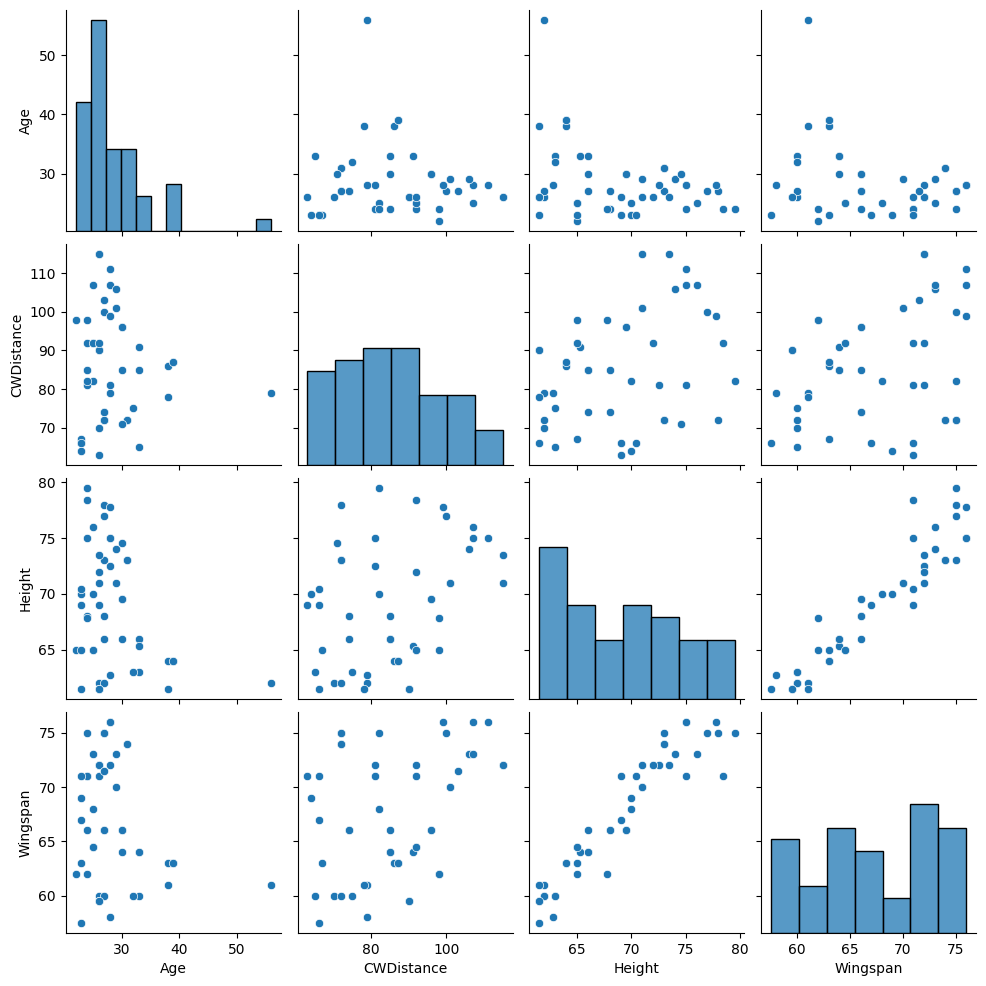

In [ ]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'

sns.pairplot(df[["Age", "CWDistance", "Height", "Wingspan"]])
plt.show()